In [1]:
import numpy as np
import seaborn as sns
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

csv_path = "iris.csv"

Load data and clean, try loading without shuffle

In [2]:
def load_csv(csv_path:str) ->Tuple[np.ndarray,np.ndarray]:
    np.random.seed(42)
    dataset = np.genfromtxt(csv_path,delimiter=',')
    np.random.shuffle(dataset,)
    x,y = dataset[:,:4],dataset[:,-1]
    return x,y

In [3]:
x,y = load_csv(csv_path)
x,y

(array([[ 6.100e+00,  2.800e+00,  4.700e+00,  1.200e+00],
        [ 5.700e+00,  3.800e+00,  1.700e+00,  3.000e-01],
        [ 7.700e+00,  2.600e+00,  6.900e+00,  2.300e+00],
        [ 6.000e+00,  2.900e+00,  4.500e+00,  1.500e+00],
        [ 6.800e+00,  2.800e+00, -1.111e+03,  1.400e+00],
        [ 5.400e+00,  3.400e+00,  1.500e+00,  4.000e-01],
        [ 5.600e+00,  2.900e+00,  3.600e+00,  1.300e+00],
        [ 6.900e+00,  3.100e+00,  5.100e+00,  2.300e+00],
        [ 6.200e+00,  2.200e+00,  4.500e+00,  1.500e+00],
        [ 5.800e+00,  2.700e+00,  3.900e+00,  1.200e+00],
        [ 6.500e+00,  3.200e+00,  5.100e+00,  2.000e+00],
        [ 4.800e+00,  3.000e+00,  1.400e+00,  1.000e-01],
        [ 5.500e+00,  3.500e+00,        nan,  2.000e-01],
        [ 4.900e+00,  3.100e+00,  1.500e+00,  1.000e-01],
        [ 5.100e+00,  1.000e+02,  1.500e+00,  3.000e-01],
        [ 6.300e+00,  3.300e+00,  4.700e+00,  1.600e+00],
        [ 6.500e+00,  3.000e+00,  5.800e+00,  2.200e+00],
        [ 5.60

In [4]:
np.mean(x,axis=0),np.var(x,axis=0)

(array([nan, nan, nan, nan]), array([nan, nan, nan, nan]))

In [13]:
np.nanmean(x,axis=0),np.nanvar(x,axis=0)

(array([ 355.46503497, -280.09189189,    2.95      ,   21.74726027]),
 array([1.73561968e+07, 1.18405444e+07, 1.51049922e+04, 6.11729208e+04]))

In [14]:
x[np.isnan(x)] = 3.5
x.shape

(150, 4)

In [15]:
np.mean(x,axis=0),np.var(x,axis=0)

(array([ 339.04      , -276.31066667,    2.95733333,   21.26066667]),
 array([1.65517522e+07, 1.16837285e+07, 1.49035963e+04, 5.95502852e+04]))

In [16]:
(x > 13.0).sum(), (x < 0.0).sum()

(4, 2)

In [17]:
x[np.where(np.logical_or(x > 13.0,x < 0.0))]

array([ -1111.,    100.,   1000.,  50000.,   3000., -42000.])

In [18]:
less_than = np.where(x < 0.0)
higher_than = np.where(x > 13.0)
less_than,higher_than

((array([  4, 140], dtype=int64), array([2, 1], dtype=int64)),
 (array([14, 27, 28, 62], dtype=int64), array([1, 2, 0, 3], dtype=int64)))

In [19]:
y = np.delete(y,np.where(x < 0.0)[0],axis=0)
y = np.delete(y,np.where(x > 13.0)[0],axis=0)
x = np.delete(x,np.where(x < 0.0)[0],axis=0)
x = np.delete(x,np.where(x > 13.0)[0],axis=0)
x.shape,y.shape

((144, 4), (144,))

Train test split
try optim

In [5]:
def train_test_split(features:np.ndarray,
                     labels:np.ndarray,
                     test_split_ratio:float) -> None:
        
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train,y_train = features[:train_size,:],labels[:train_size]
    x_test,y_test = features[train_size:train_size+test_size,:], labels[train_size:train_size + test_size]
    return (x_train,y_train,x_test,y_test)

Distance

In [6]:
def euclidean(points:np.ndarray,element_of_x:np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((points - element_of_x)**2,axis=1))

Predict func

In [13]:
def predict(x_train:np.ndarray,y_train:np.ndarray,x_test:np.ndarray,k:int) -> np.ndarray:
    labels_pred = []
    for x_test_element in x_test:
        distances = euclidean(x_train,x_test_element)

        print(distances)
        print("AAAAAAAAAAAAAAAAAAAAAAAAA")

        distances = np.array(sorted(zip(distances,y_train)))
        label_pred = mode(distances[:k,1],keepdims=False).mode
        labels_pred.append(label_pred)
    return np.array(labels_pred,dtype=np.int32)

In [14]:
x_train, y_train, x_test, y_test = train_test_split(x,y, 0.2)

y_preds = predict(x_train, y_train, x_test, 3)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
AAAAAAAAAAAAAAAAAAAAAAAAA
[3.89615195e+00 1.96214169e+00 6.75943785e+00 3.78021163e+00
 1.11230303e+03 1.43874946e+00 2.80356915e+00 4.98397432e+00
 3.81837662e+00 3.06920185e+00 4.70531614e+00 7.93725393e-01
            nan 9.38083152e-01 9.77020471e+01 4.18210473e+00
 5.32447180e+00 2.94108823e+00            nan            nan
 9.74679434e-01 4.27317212e+00 1.24899960e+00 5.05865595e+00
 6.53528882e+00 4.95378643e+00 5.23259018e+00 9.98705057e+02
 4.99955000e+04 9.11043358e-01 1.34164079e+00 2.42899156e+0

Metrics

In [26]:
def accuracy(y_test:np.ndarray,y_preds:np.ndarray) -> float:
    true_positive = (y_test == y_preds).sum()
    return true_positive / len(y_test) * 100

accuracy(y_test, y_preds)

89.28571428571429

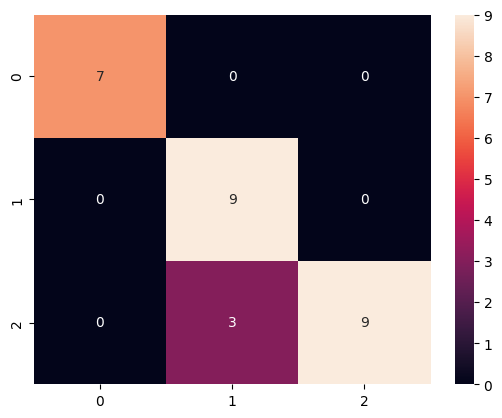

In [27]:
def plot_confusion_matrix(y_test:np.ndarray,y_preds:np.ndarray):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True) 

plot_confusion_matrix(y_test, y_preds)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x,y,0.2)

y_preds = predict(x_train, y_train, x_test, 3)

print(accuracy(y_test, y_preds))